In [ ]:
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn import preprocessing
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split
from sklearn import metrics
import seaborn as sns
from scipy import stats
from sklearn.model_selection import GridSearchCV

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Load the file

data = pd.read_csv("/content/drive/MyDrive/data_dausare.csv")
data = data.set_index('Datetime')

In [ ]:
data = data.dropna(subset=["NO2(GT)"])
data = data.dropna(subset=["T"])

In [ ]:
data.describe()

,PT08.S1(CO),PT08.S2(NMHC),PT08.S3(NOx),NO2(GT),PT08.S5(O3),T,RH,AH
count,7393.000000,7393.000000,7393.000000,7393.000000,7393.000000,7393.000000,7393.000000,7393.000000
mean,1111.994511,950.533117,824.452117,112.129974,1045.593388,17.962874,48.773557,0.994757
std,218.283725,265.446325,256.934144,47.618852,405.881021,9.001704,17.494708,0.403659
min,647.250000,383.250000,322.000000,2.000000,221.000000,-1.900000,9.175000,0.184679
25%,949.500000,749.250000,648.500000,77.000000,748.000000,11.275000,35.124999,0.699130
50%,1077.750000,925.000000,791.500000,108.500000,990.750000,17.100000,48.999999,0.964687
75%,1246.250000,1127.500000,954.500000,140.000000,1307.250000,24.050000,62.175000,1.271086
max,2039.750000,2214.000000,2682.750000,332.600000,2522.750000,44.600000,88.725000,2.180639


In [ ]:
seed = 42

In [ ]:
x = data.drop(['NO2(GT)'], axis = 1)
y = pd.DataFrame(data['NO2(GT)'])

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=seed, shuffle=True)

x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.15, random_state=seed, shuffle=True)

# Random Forest

In [ ]:
for max_depth in [2, 3, 4, 5, 7, 20]:
    for n_estimators in [50, 100, 200, 500]:
        clf = RandomForestRegressor(random_state=seed, max_depth=max_depth, n_estimators=n_estimators)
        scaler = StandardScaler()
        scaler_y = StandardScaler()

        clf.fit(scaler.fit_transform(x_train), np.ravel(scaler_y.fit_transform(y_train)))
        r2 = clf.score(scaler.transform(x_val), np.ravel(scaler_y.transform(y_val)))
        y_hat = clf.predict(scaler.transform(x_val))
        rmse = metrics.mean_squared_error(np.ravel(scaler_y.transform(y_val)), y_hat, squared=False)
        print(f'{max_depth=}, {n_estimators=}, {r2=}, {rmse=}')

max_depth=2, n_estimators=50, r2=0.49550028188102013, rmse=0.6871160095221396
max_depth=2, n_estimators=100, r2=0.4942843325473253, rmse=0.6879435574855572
max_depth=2, n_estimators=200, r2=0.4921707441706027, rmse=0.6893796544111235
max_depth=2, n_estimators=500, r2=0.49305873556577673, rmse=0.6887766652806105
max_depth=3, n_estimators=50, r2=0.6102628640425078, rmse=0.6039284629677334
max_depth=3, n_estimators=100, r2=0.6113651013642267, rmse=0.603073856422492
max_depth=3, n_estimators=200, r2=0.6125555891226627, rmse=0.6021494634931815
max_depth=3, n_estimators=500, r2=0.6146404588688509, rmse=0.6005271706175189
max_depth=4, n_estimators=50, r2=0.6777804970420364, rmse=0.5491304357203287
max_depth=4, n_estimators=100, r2=0.6797298890560544, rmse=0.5474668268309112
max_depth=4, n_estimators=200, r2=0.6814186481152527, rmse=0.546021544377624
max_depth=4, n_estimators=500, r2=0.6833554822996718, rmse=0.5443592288414215
max_depth=5, n_estimators=50, r2=0.7465855936059731, rmse=0.4869846

In [ ]:
n_estimators = 200
res = []
for max_depth in range(2, 21): 
    clf = RandomForestRegressor(random_state=seed, max_depth=max_depth, n_estimators=n_estimators)
    scaler = StandardScaler()
    scaler_y = StandardScaler()

    clf.fit(scaler.fit_transform(x_train), np.ravel(scaler_y.fit_transform(y_train)))
    r2 = clf.score(scaler.transform(x_val), np.ravel(scaler_y.transform(y_val)))
    y_hat = clf.predict(scaler.transform(x_val))
    rmse = metrics.mean_squared_error(np.ravel(scaler_y.transform(y_val)), y_hat, squared=False)
    print(f'{max_depth=}, {n_estimators=}, {r2=}, {rmse=}')
    res.append(rmse)

max_depth=2, n_estimators=200, r2=0.4921707441706027, rmse=0.6893796544111235
max_depth=3, n_estimators=200, r2=0.6125555891226627, rmse=0.6021494634931815
max_depth=4, n_estimators=200, r2=0.6814186481152527, rmse=0.546021544377624
max_depth=5, n_estimators=200, r2=0.749673732005907, rmse=0.484008307514678
max_depth=6, n_estimators=200, r2=0.7801018012527698, rmse=0.4536390575948016
max_depth=7, n_estimators=200, r2=0.7977690904056629, rmse=0.4350341710066762
max_depth=8, n_estimators=200, r2=0.807326838044185, rmse=0.42462955238385897
max_depth=9, n_estimators=200, r2=0.8122343606867486, rmse=0.4191868630032356
max_depth=10, n_estimators=200, r2=0.816039704884266, rmse=0.41491740437670427
max_depth=11, n_estimators=200, r2=0.8186423014842736, rmse=0.41197190668121825
max_depth=12, n_estimators=200, r2=0.8206568691889876, rmse=0.4096773721585179
max_depth=13, n_estimators=200, r2=0.8208780161753593, rmse=0.4094247088356694
max_depth=14, n_estimators=200, r2=0.8209804652913697, rmse=0.

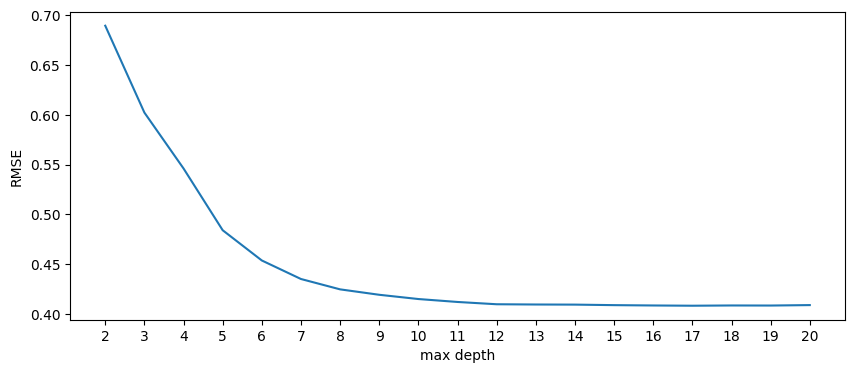

In [ ]:
fig, ax = plt.subplots(figsize=(10,4))
ax.plot(range(2,21), res)
plt.xlabel("max depth")
plt.ylabel("RMSE")
plt.xticks(range(2, 21), range(2, 21))
plt.show()

In [ ]:
# Selected parameters
n_estimators = 200
max_depth = 7

In [ ]:
print(f'RF, {max_depth = }, {n_estimators = }')
clf = RandomForestRegressor(max_depth=max_depth, n_estimators=n_estimators)
scaler = StandardScaler()
scaler_y = StandardScaler()

clf.fit(scaler.fit_transform(x_train), np.ravel(scaler_y.fit_transform(y_train)))
r2 = clf.score(scaler.transform(x_val), np.ravel(scaler_y.transform(y_val)))
y_hat = clf.predict(scaler.transform(x_val))

rmse = metrics.mean_squared_error(np.ravel(scaler_y.transform(y_val)), y_hat, squared=False)
print(f'VAL: {r2 = }, {rmse = }')

r2 = clf.score(scaler.transform(x_test), np.ravel(scaler_y.transform(y_test)))
y_hat = clf.predict(scaler.transform(x_test))
rmse = metrics.mean_squared_error(np.ravel(scaler_y.transform(y_test)), y_hat, squared=False)
print(f'TEST: {r2 = }, {rmse = }')

RF, max_depth = 7, n_estimators = 200
VAL: r2 = 0.797971489920192, rmse = 0.4348164180745148
TEST: r2 = 0.8224486015287417, rmse = 0.4110766108967458


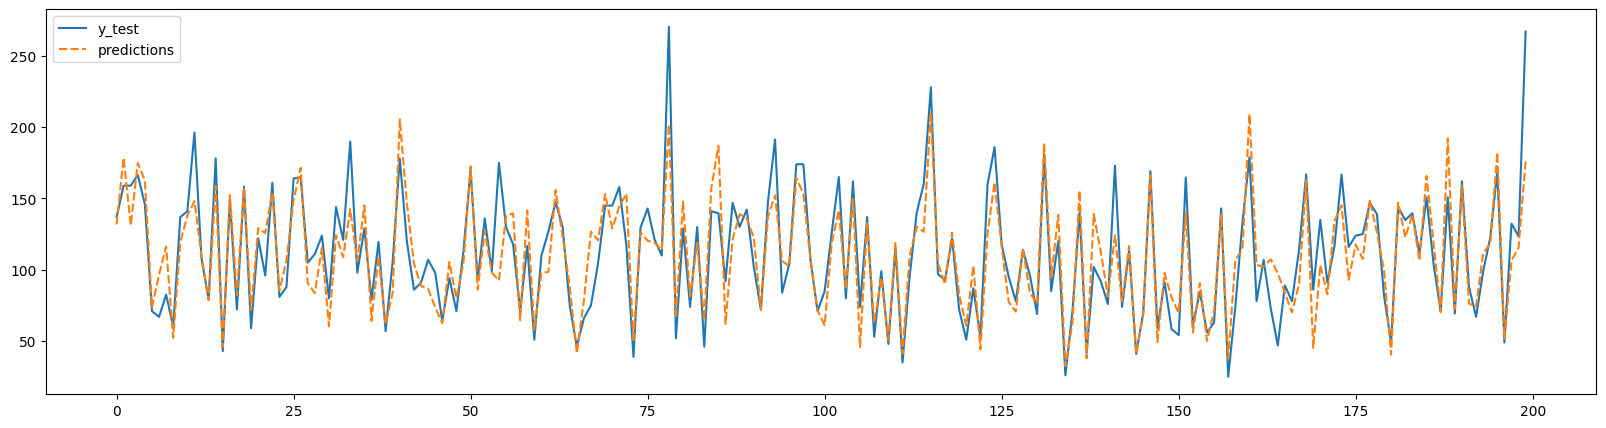

In [ ]:
clf = RandomForestRegressor(max_depth=max_depth, n_estimators=n_estimators)
scaler = StandardScaler()
scaler_y = StandardScaler()
clf.fit(scaler.fit_transform(x_train), np.ravel(scaler_y.fit_transform(y_train)))
y_hat = clf.predict(scaler.transform(x_test))

aux = pd.DataFrame()

aux['y_test'] = y_test
aux['predictions'] = scaler_y.inverse_transform(y_hat.reshape(-1,1))
aux = aux.reset_index().drop(['Datetime'], axis = 1)

plt.figure(figsize=(20,5))
sns.lineplot(data=aux.iloc[:200,:])
plt.show()

## Random Forest with Season

In [ ]:
data_season = pd.read_csv("/content/drive/MyDrive/data_stagioni (1).csv")
data_season = data_season.set_index('Datetime')

In [ ]:
data_season = data_season.dropna(subset=["NO2(GT)"])
data_season = data_season.dropna(subset=["T"])

In [ ]:
sns.pairplot(data_season, hue='Season')
plt.show()

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
x2 = data_season.drop(['NO2(GT)'], axis = 1)
y2 = pd.DataFrame(data_season['NO2(GT)'])
x2 = pd.get_dummies(data=x2)

x2_train, x2_test, y2_train, y2_test = train_test_split(x2, y2, test_size=0.2, random_state=seed, shuffle=True)

x2_train, x2_val, y2_train, y2_val = train_test_split(x2_train, y2_train, test_size=0.15, random_state=seed, shuffle=True)

In [ ]:
for max_depth in [2, 3, 4, 5, 7, 20]:
    for n_estimators in [50, 100, 200, 500]:
        clf = RandomForestRegressor(random_state=seed, max_depth=max_depth, n_estimators=n_estimators)
        scaler = StandardScaler()
        scaler_y = StandardScaler()

        clf.fit(scaler.fit_transform(x2_train), np.ravel(scaler_y.fit_transform(y2_train)))
        r2 = clf.score(scaler.transform(x2_val), np.ravel(scaler_y.transform(y2_val)))
        y2_hat = clf.predict(scaler.transform(x2_val))
        rmse = metrics.mean_squared_error(np.ravel(scaler_y.transform(y2_val)), y2_hat, squared=False)
        print(f'{max_depth=}, {n_estimators=}, {r2=}, {rmse=}')

max_depth=2, n_estimators=50, r2=0.49550028188102013, rmse=0.6871160095221396
max_depth=2, n_estimators=100, r2=0.4942843325473253, rmse=0.6879435574855572
max_depth=2, n_estimators=200, r2=0.4923242960214128, rmse=0.6892754229950531
max_depth=2, n_estimators=500, r2=0.49346481245567053, rmse=0.6885007434533126
max_depth=3, n_estimators=50, r2=0.610262864042508, rmse=0.6039284629677333
max_depth=3, n_estimators=100, r2=0.6113651013642267, rmse=0.603073856422492
max_depth=3, n_estimators=200, r2=0.6126902207441154, rmse=0.6020448350611918
max_depth=3, n_estimators=500, r2=0.6155008231642556, rmse=0.5998564192965842
max_depth=4, n_estimators=50, r2=0.6778086556089771, rmse=0.5491064411082308
max_depth=4, n_estimators=100, r2=0.6796753284652538, rmse=0.5475134575348855
max_depth=4, n_estimators=200, r2=0.6815532891213788, rmse=0.5459061505247513
max_depth=4, n_estimators=500, r2=0.6840883369354451, rmse=0.5437289206282535
max_depth=5, n_estimators=50, r2=0.747245968529417, rmse=0.48634969

In [ ]:
n_estimators = 200
res = []
for max_depth in range(2, 21): 
    clf = RandomForestRegressor(random_state=seed, max_depth=max_depth, n_estimators=n_estimators)
    scaler = StandardScaler()
    scaler_y = StandardScaler()

    clf.fit(scaler.fit_transform(x2_train), np.ravel(scaler_y.fit_transform(y2_train)))
    r2 = clf.score(scaler.transform(x2_val), np.ravel(scaler_y.transform(y2_val)))
    y2_hat = clf.predict(scaler.transform(x2_val))
    rmse = metrics.mean_squared_error(np.ravel(scaler_y.transform(y2_val)), y2_hat, squared=False)
    print(f'{max_depth=}, {n_estimators=}, {r2=}, {rmse=}')
    res.append(rmse)

max_depth=2, n_estimators=200, r2=0.4923242960214128, rmse=0.6892754229950531
max_depth=3, n_estimators=200, r2=0.6126902207441154, rmse=0.6020448350611918
max_depth=4, n_estimators=200, r2=0.6815532891213788, rmse=0.5459061505247513
max_depth=5, n_estimators=200, r2=0.7505096931803752, rmse=0.48319946208094927
max_depth=6, n_estimators=200, r2=0.7822758683138125, rmse=0.45139099114383413
max_depth=7, n_estimators=200, r2=0.8014847925123488, rmse=0.4310190790150366
max_depth=8, n_estimators=200, r2=0.8120822387650938, rmse=0.4193566347489553
max_depth=9, n_estimators=200, r2=0.8183813421825787, rmse=0.41226819753607263
max_depth=10, n_estimators=200, r2=0.8226515389220068, rmse=0.40739276851451367
max_depth=11, n_estimators=200, r2=0.8250162681911013, rmse=0.40466760657629963
max_depth=12, n_estimators=200, r2=0.8267431779504121, rmse=0.4026658285753319
max_depth=13, n_estimators=200, r2=0.8279984933341878, rmse=0.40120443870552486
max_depth=14, n_estimators=200, r2=0.8274756593544024,

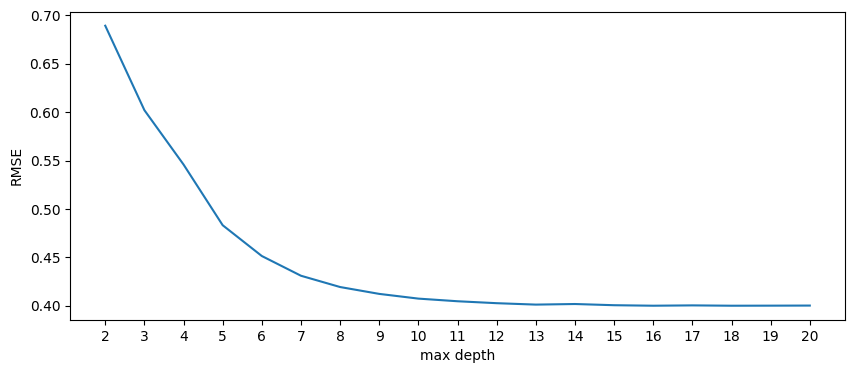

In [ ]:
fig, ax = plt.subplots(figsize=(10,4))
ax.plot(range(2,21), res)
plt.xlabel("max depth")
plt.ylabel("RMSE")
plt.xticks(range(2, 21), range(2, 21))
plt.show()

In [ ]:
n_estimators = 200
max_depth = 7

In [ ]:
print(f'RF, {max_depth = }, {n_estimators = }')
clf = RandomForestRegressor(max_depth=max_depth, n_estimators=n_estimators)
scaler = StandardScaler()
scaler_y = StandardScaler()

clf.fit(scaler.fit_transform(x2_train), np.ravel(scaler_y.fit_transform(y2_train)))
r2 = clf.score(scaler.transform(x2_val), np.ravel(scaler_y.transform(y2_val)))
y2_hat = clf.predict(scaler.transform(x2_val))

rmse = metrics.mean_squared_error(np.ravel(scaler_y.transform(y2_val)), y2_hat, squared=False)
print(f'VAL: {r2 = }, {rmse = }')

r2 = clf.score(scaler.transform(x2_test), np.ravel(scaler_y.transform(y2_test)))
y2_hat = clf.predict(scaler.transform(x2_test))
rmse = metrics.mean_squared_error(np.ravel(scaler_y.transform(y2_test)), y2_hat, squared=False)
print(f'TEST: {r2 = }, {rmse = }')

RF, max_depth = 7, n_estimators = 200
VAL: r2 = 0.8002788168234203, rmse = 0.43232631256380843
TEST: r2 = 0.8255688049706595, rmse = 0.4074485689048844


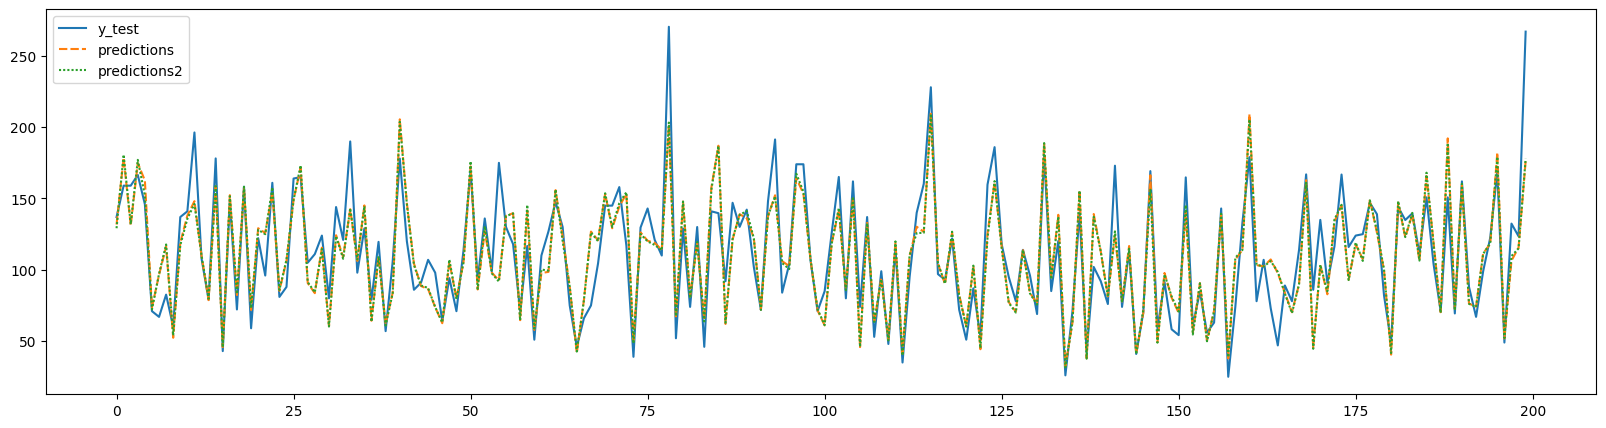

In [ ]:
clf = RandomForestRegressor(max_depth=max_depth, n_estimators=n_estimators)
scaler = StandardScaler()
scaler_y = StandardScaler()
clf.fit(scaler.fit_transform(x2_train), np.ravel(scaler_y.fit_transform(y2_train)))
y2_hat = clf.predict(scaler.transform(x2_test))

aux['predictions2'] = scaler_y.inverse_transform(y2_hat.reshape(-1,1))

plt.figure(figsize=(20,5))

sns.lineplot(data=aux.iloc[:200,:])

plt.show()
# It can be seen that the new model used the new information to react slightly better to abrupt changes 
# in the predicted variable.

# SVM

In [ ]:
from sklearn.svm import SVR

In [ ]:
clf = SVR(kernel='rbf')
scaler = StandardScaler()
scaler_y = StandardScaler()

scaler.fit_transform(x_train)
clf.fit(scaler.fit_transform(x_train), np.ravel(scaler_y.fit_transform(y_train)))
r2 = clf.score(scaler.transform(x_val), np.ravel(scaler_y.transform(y_val)))
y_hat = clf.predict(scaler.transform(x_val))
rmse = metrics.mean_squared_error(np.ravel(scaler_y.transform(y_val)), y_hat, squared=False)
r2, rmse

(0.8106166490460214, 0.4209887611577317)

In [ ]:
res = []
for C in np.logspace(start=-3, stop=3, num=10, base=10, endpoint=True):
    for gamma in np.logspace(start=-3, stop=3, num=10, base=10, endpoint=True):
        clf = SVR(kernel='rbf', gamma=gamma, C=C)
        scaler = StandardScaler()
        scaler_y = StandardScaler()

        scaler.fit_transform(x_train)
        clf.fit(scaler.fit_transform(x_train), np.ravel(scaler_y.fit_transform(y_train)))
        r2 = clf.score(scaler.transform(x_val), np.ravel(scaler_y.transform(y_val)))
        y_hat = clf.predict(scaler.transform(x_val))
        rmse = metrics.mean_squared_error(np.ravel(scaler_y.transform(y_val)), y_hat, squared=False)
        print(f'{C=}, {gamma=}, {r2=}, {rmse=}')
        res.append({
            'C': C,
            'gamma': gamma,
            'R2': r2,
            'RMSE': rmse,
        })

C=0.001, gamma=0.001, r2=0.018767773233364315, rmse=0.9582647333513566
C=0.001, gamma=0.004641588833612777, r2=0.10833732603684043, rmse=0.9134817959336666
C=0.001, gamma=0.021544346900318832, r2=0.3103260501800934, rmse=0.8033809228133458
C=0.001, gamma=0.1, r2=0.4024117036714514, rmse=0.7478261460962674
C=0.001, gamma=0.46415888336127775, r2=0.2031369873970308, rmse=0.8635578533256654
C=0.001, gamma=2.154434690031882, r2=0.020223568930624047, rmse=0.9575536093914441
C=0.001, gamma=10.0, r2=-0.009577022270590874, rmse=0.9720068653116054
C=0.001, gamma=46.41588833612773, r2=-0.011738300749991382, rmse=0.9730467336682176
C=0.001, gamma=215.44346900318823, r2=-0.011849845568082662, rmse=0.9731003717134414
C=0.001, gamma=1000.0, r2=-0.011853897665477398, rmse=0.9731023201712837
C=0.004641588833612777, gamma=0.001, r2=0.11715240433192609, rmse=0.908955188201837
C=0.004641588833612777, gamma=0.004641588833612777, r2=0.3836882848406299, rmse=0.7594510993871009
C=0.004641588833612777, gamma=0

In [ ]:
heatmap_data = pd.DataFrame(res).pivot(index='C', columns='gamma', values='RMSE')
heatmap_data

gamma,0.001000,0.004642,0.021544,0.100000,0.464159,2.154435,10.000000,46.415888,215.443469,1000.000000
C,,,,,,,,,,
0.001000,0.958265,0.913482,0.803381,0.747826,0.863558,0.957554,0.972007,0.973047,0.973100,0.973102
0.004642,0.908955,0.759451,0.596258,0.564947,0.674373,0.906703,0.968108,0.972568,0.972820,0.972830
0.021544,0.749145,0.574508,0.514506,0.485620,0.514776,0.751736,0.951293,0.971729,0.972889,0.972931
0.100000,0.573944,0.522137,0.484476,0.449056,0.443111,0.552189,0.883929,0.967605,0.972626,0.972804
0.464159,0.528853,0.500115,0.458800,0.428547,0.415350,0.446635,0.724944,0.951017,0.971521,0.972365
2.154435,0.514550,0.482394,0.442352,0.420690,0.405525,0.437591,0.634299,0.923202,0.966024,0.967694
10.000000,0.499293,0.462279,0.431582,0.417399,0.408070,0.465592,0.629850,0.922676,0.965796,0.967450
46.415888,0.483123,0.448783,0.425073,0.415137,0.419417,0.492338,0.629850,0.922676,0.965796,0.967450
215.443469,0.466669,0.438882,0.420481,0.416431,0.448704,0.515294,0.629850,0.922676,0.965796,0.967450


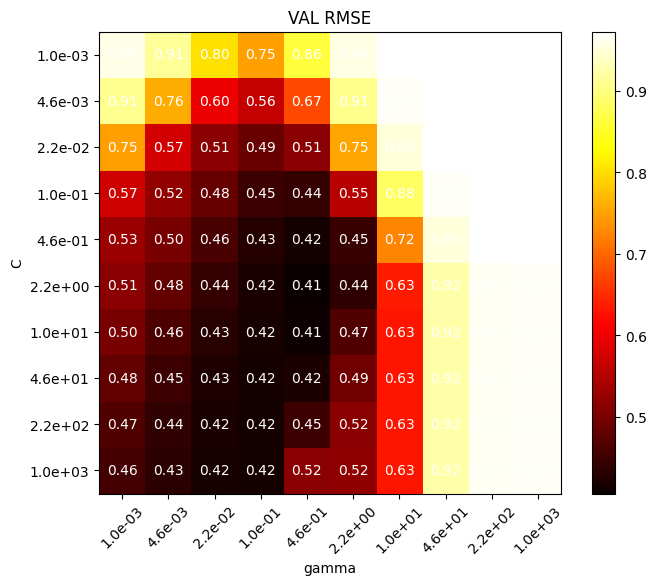

In [ ]:
p_range = np.logspace(start=-3, stop=3, num=10, base=10, endpoint=True)
p_range_str = [f'{p:.1e}' for p in p_range]

fig, ax = plt.subplots(figsize=(8,6))

heatmap = ax.imshow(
    heatmap_data,
    interpolation="nearest",
    cmap=plt.cm.hot,
)

data = heatmap_data.values
for i in range(data.shape[0]):
    for j in range(data.shape[1]):
        c = 'black' if data[i, j] >= 1 else 'white'
        ax.text(j, i, f'{data[i, j]:.2f}', ha='center', va='center', color=c, fontsize=10)


ax.set_xlabel("gamma")
ax.set_ylabel("C")
plt.colorbar(heatmap, ax=ax)
ax.set_xticks(np.arange(len(p_range)), p_range_str, rotation=45)
ax.set_yticks(np.arange(len(p_range)), p_range_str)
plt.title("VAL RMSE")
plt.show()

In [ ]:
df = pd.DataFrame(res)
df.iloc[df.RMSE.argmin()]

C        2.154435
gamma    0.464159
R2       0.824274
RMSE     0.405525
Name: 54, dtype: float64

In [ ]:
C = 2.154435
gamma = 0.464159

In [ ]:
print(f'SVC, {C=}, {gamma=}')
clf = SVR(C=C, gamma=gamma, kernel='rbf')
scaler = StandardScaler()
scaler_y = StandardScaler()

clf.fit(scaler.fit_transform(x_train), np.ravel(scaler_y.fit_transform(y_train)))

r2 = clf.score(scaler.transform(x_val), np.ravel(scaler_y.transform(y_val)))
y_hat = clf.predict(scaler.transform(x_val))
rmse = metrics.mean_squared_error(np.ravel(scaler_y.transform(y_val)), y_hat, squared=False)
print(f'VAL: {r2=}, {rmse=}')

r2 = clf.score(scaler.transform(x_test), np.ravel(scaler_y.transform(y_test)))
y_hat = clf.predict(scaler.transform(x_test))
rmse = metrics.mean_squared_error(np.ravel(scaler_y.transform(y_test)), y_hat, squared=False)
print(f'TEST: {r2=}, {rmse=}')

SVC, C=2.154435, gamma=0.464159
VAL: r2=0.8242769246090943, rmse=0.40552160890805955
TEST: r2=0.8522982487531072, rmse=0.3749328913418827


In [ ]:
clf = SVR(C=C, gamma=gamma, kernel='rbf')
scaler = StandardScaler()
scaler_y = StandardScaler()
clf.fit(scaler.fit_transform(x_train), np.ravel(scaler_y.fit_transform(y_train)))
y_hat = clf.predict(scaler.transform(x_test))

aux = pd.DataFrame()

aux['y_test'] = y_test
aux['predictions'] = scaler_y.inverse_transform(y_hat.reshape(-1,1))
aux = aux.reset_index().drop(['Datetime'], axis = 1)

plt.figure(figsize=(20,5))
sns.lineplot(data=aux.iloc[800:1000,:])
plt.show()

NameError: ignored